In [1]:
from IPython.core.debugger import set_trace

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [2]:
df = pd.read_csv("Datasets/BBCA-small-arima.csv")
df

,Date,Close
0,03/01/2022,7325.0
1,04/01/2022,7400.0
2,05/01/2022,7362.5
3,06/01/2022,7425.0
4,07/01/2022,7462.5
5,10/01/2022,7562.5
6,11/01/2022,7625.0
7,12/01/2022,7650.0
8,13/01/2022,7700.0
9,14/01/2022,7700.0


In [3]:
df = df[["Close"]].copy()

In [4]:
df.describe()

,Close
count,15.000000
mean,7593.333333
std,158.104471
min,7325.000000
25%,7443.750000
50%,7650.000000
75%,7706.250000
max,7800.000000


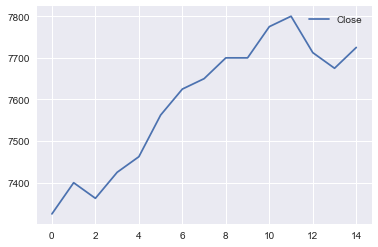

In [5]:
df.plot()
plt.show()

# Check Correlation and Autocorrelation

## ACF (AutoCorrelation Function)

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

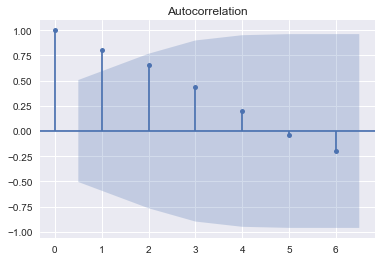

In [7]:
plot_acf(df, lags=6)
plt.show()

## PACF (Partial AutoCorrelation Function)

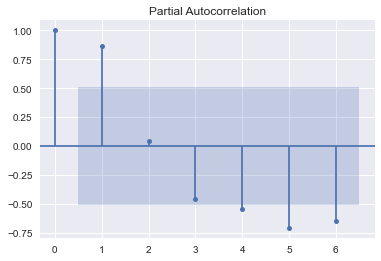

In [8]:
plot_pacf(df, lags=6)
plt.show()

 ## Train Test Split

In [9]:
n = int(len(df) * 0.8)
train = df.Close[:n]
test = df.Close[n:]


In [10]:
print(len(train))
print(len(test))

12
3


## Training ARIMA model

In [11]:
from statsmodels.tsa.arima_model import ARIMA

In [12]:
model = ARIMA(train, order=(0,0,2))
result = model.fit(disp=2)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92913D+00    |proj g|=  2.75868D-02

At iterate    2    f=  5.91518D+00    |proj g|=  6.56781D-03

At iterate    4    f=  5.91406D+00    |proj g|=  2.07880D-03

At iterate    6    f=  5.89288D+00    |proj g|=  1.95757D-03

At iterate    8    f=  5.79086D+00    |proj g|=  1.72573D-04

At iterate   10    f=  5.79073D+00    |proj g|=  3.23297D-04

At iterate   12    f=  5.79073D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/yoelagustinus/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.
/Users/yoelagustinus/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversion

In [13]:
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                   12
Model:                     ARMA(0, 2)   Log Likelihood                 -69.489
Method:                       css-mle   S.D. of innovations             66.071
Date:                Fri, 06 May 2022   AIC                            146.978
Time:                        21:33:06   BIC                            148.917
Sample:                             0   HQIC                           146.259
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7565.1931     56.671    133.493      0.000    7454.120    7676.267
ma.L1.Close     1.2087      0.272      4.450      0.000       0.676       1.741
ma.L2.Close     1.0000      0.317      3.152    

In [14]:
forecasts = result.forecast(3).tolist()
test_values = test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)

AttributeError: 'tuple' object has no attribute 'tolist'